In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dataset_train=pd.read_csv(r"C:\Users\ShibuKumar\Downloads\Datas\Google_Stock_Price_Train.csv")

In [49]:
train_set=dataset_train.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [50]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_set_scaled=scaler.fit_transform(train_set)
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [51]:
train_set_scaled.shape

(1258, 1)

In [52]:
x_train=[]
y_train=[]

for i in range(60,len(train_set_scaled)):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
    
x_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [53]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [54]:
x_train.shape

(1198, 60)

In [55]:
#we will change 3D array
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [56]:
#Create a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [57]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mean_squared_error")

In [91]:
#This is regression problem so we used Mean squared error
model.fit(x_train,y_train,epochs=100,batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0023
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0022
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0021
Epoch 4/100
1198/1198 [==============================] - 18s 15ms/sample - loss: 0.0022
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/sample - loss: 0.0023
Epoch 6/100
1198/1198 [==============================] - 17s 14ms/sample - loss: 0.0021
Epoch 7/100
1198/1198 [==============================] - 16s 13ms/sample - loss: 0.0021
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/sample - loss: 0.0021
Epoch 9/100
1198/1198 [==============================] - 16s 14ms/sample - loss: 0.0022
Epoch 10/100
1198/1198 [==============================] - 16s 13ms/sample - loss: 0.0018
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0018
Epoch 12/1

Epoch 93/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0010
Epoch 94/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0011
Epoch 95/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0010
Epoch 96/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0012
Epoch 97/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0011
Epoch 98/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0011
Epoch 99/100
1198/1198 [==============================] - 14s 11ms/sample - loss: 0.0011
Epoch 100/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0011


In [92]:
#predict the value using test data
dataset_test=pd.read_csv(r"C:\Users\ShibuKumar\Downloads\Datas\Google_Stock_Price_Test.csv")

In [93]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [94]:
dataset_total=pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0) #(0 is row 1 is column)
dataset_total.shape

(1278,)

In [95]:
test_data= dataset_total[len(dataset_total)-len(dataset_test)-60:].values
test_data.shape

(80,)

In [96]:
test_data

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [97]:
test_data=test_data.reshape(-1,1)
test_data

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [98]:
#Normalize the data
test_data=scaler.fit_transform(test_data)
test_data

array([[0.3691268 ],
       [0.37620682],
       [0.35528856],
       [0.451298  ],
       [0.4201888 ],
       [0.39294143],
       [0.39755417],
       [0.37770865],
       [0.46406351],
       [0.57552027],
       [0.62980047],
       [0.54076378],
       [0.64696417],
       [0.7733319 ],
       [0.6624115 ],
       [0.60512766],
       [0.6839734 ],
       [0.54580562],
       [0.41085604],
       [0.36054495],
       [0.24308088],
       [0.06511478],
       [0.32085389],
       [0.41632697],
       [0.37921047],
       [0.49967818],
       [0.12819138],
       [0.1181077 ],
       [0.025531  ],
       [0.11381678],
       [0.23954087],
       [0.28727741],
       [0.19330616],
       [0.30079382],
       [0.24822999],
       [0.21100622],
       [0.16530787],
       [0.28899378],
       [0.2733319 ],
       [0.13784596],
       [0.        ],
       [0.14074233],
       [0.21604806],
       [0.17603519],
       [0.29918472],
       [0.37985411],
       [0.43391976],
       [0.528

In [99]:
x_test=[]

for i in range(60,80):
    x_test.append(test_data[i-60:i,0])
    
x_test

[array([0.3691268 , 0.37620682, 0.35528856, 0.451298  , 0.4201888 ,
        0.39294143, 0.39755417, 0.37770865, 0.46406351, 0.57552027,
        0.62980047, 0.54076378, 0.64696417, 0.7733319 , 0.6624115 ,
        0.60512766, 0.6839734 , 0.54580562, 0.41085604, 0.36054495,
        0.24308088, 0.06511478, 0.32085389, 0.41632697, 0.37921047,
        0.49967818, 0.12819138, 0.1181077 , 0.025531  , 0.11381678,
        0.23954087, 0.28727741, 0.19330616, 0.30079382, 0.24822999,
        0.21100622, 0.16530787, 0.28899378, 0.2733319 , 0.13784596,
        0.        , 0.14074233, 0.21604806, 0.17603519, 0.29918472,
        0.37985411, 0.43391976, 0.52896374, 0.56650933, 0.56586569,
        0.59869127, 0.48948723, 0.55964385, 0.54977473, 0.51244368,
        0.49678181, 0.4944218 , 0.52681828, 0.41557606, 0.40935422]),
 array([0.37620682, 0.35528856, 0.451298  , 0.4201888 , 0.39294143,
        0.39755417, 0.37770865, 0.46406351, 0.57552027, 0.62980047,
        0.54076378, 0.64696417, 0.7733319 , 0.

In [100]:
x_test=np.array(x_test)

In [101]:
x_test.shape

(20, 60)

In [102]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [103]:
y_predict=model.predict(x_test)
y_predict

array([[0.43095842],
       [0.39417374],
       [0.4095054 ],
       [0.4340425 ],
       [0.48610142],
       [0.5786408 ],
       [0.64178085],
       [0.64359456],
       [0.6399748 ],
       [0.6428064 ],
       [0.6470086 ],
       [0.64532083],
       [0.6409792 ],
       [0.64803684],
       [0.65750444],
       [0.7417058 ],
       [0.8407085 ],
       [0.9220644 ],
       [0.91864526],
       [0.8001565 ]], dtype=float32)

In [104]:
predicted=scaler.inverse_transform(y_predict)
predicted

array([[784.7639 ],
       [781.33484],
       [782.7641 ],
       [785.05145],
       [789.9044 ],
       [798.5309 ],
       [804.41675],
       [804.5859 ],
       [804.2485 ],
       [804.51245],
       [804.9041 ],
       [804.74677],
       [804.3421 ],
       [805.     ],
       [805.88257],
       [813.7318 ],
       [822.9608 ],
       [830.54486],
       [830.22614],
       [819.18054]], dtype=float32)

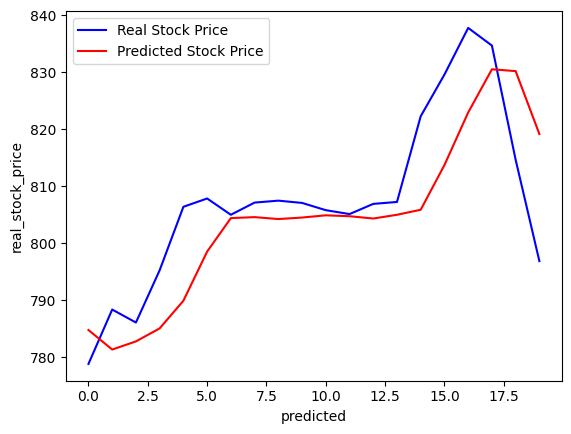

In [105]:
plt.plot(real_stock_price,color="b",label="Real Stock Price")
plt.plot(predicted,color="r",label="Predicted Stock Price")
plt.xlabel("predicted")
plt.ylabel("real_stock_price")
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(real_stock_price,predicted)
mse

104.79939998414537

In [107]:
r2=r2_score(real_stock_price,predicted)
r2

0.5178081953505576

In [108]:
model.save("RNN-LSTM-Google Stack.h5")